In [1]:
import pandas as pd

from netam import framework, models

In [2]:
pcp_df = pd.read_csv("~/data/shmoof_edges_11-Jan-2023_NoNode0_iqtree_K80+R_masked.csv")
crepe_prefix = "../pretrained/hs_fivemer"
assert framework.crepe_exists(crepe_prefix)
crepe = framework.load_crepe(crepe_prefix)

seqs = list(pcp_df.sample(3)["parent"])
out = crepe(seqs)

out[:, 100:110]

tensor([[0.4857, 0.9524, 1.1715, 2.3514, 1.9565, 0.4381, 0.4912, 1.0016, 1.5439,
         0.4601],
        [2.5342, 1.4084, 1.8315, 1.6362, 0.7576, 0.7429, 1.3116, 0.9589, 0.8469,
         2.3514],
        [1.4902, 2.2828, 1.0282, 1.7053, 1.5937, 0.4381, 0.1762, 0.2236, 0.2355,
         1.9708]], grad_fn=<SliceBackward0>)

Let's look at the per-site rates for the first sequence in `pcp_df`.

<Axes: >

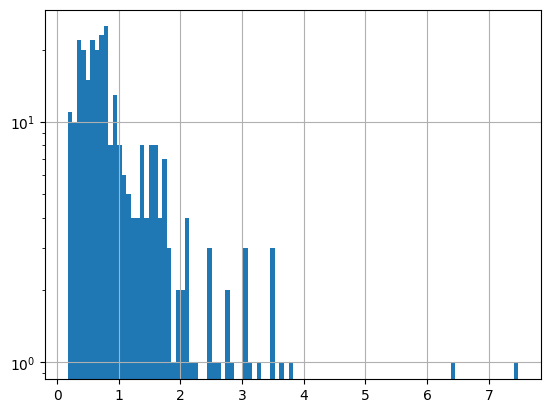

In [3]:
single = pcp_df.loc[0, "parent"]
out = crepe([single])
value_N = out.mode().values.item()

# actual_values are the values that aren't an N for this crepe.
actual_values = out != value_N 
demo_values = out[actual_values].detach().numpy()
demo_values
pd.Series(demo_values).hist(log=True, bins=100)